## Business Context and Objective
Analytics driving every industry based on a variety of technology platforms which collect information
from various sources by analysing what customers certainly want. The Credit Card industry is also
data rich industry and data can be leveraged in infinite ways to understand customer behaviour.
The data from a credit card processor shows the consumer types and their business spending
behaviours. Therefore, companies can develop the marketing campaigns that directly address
consumers’ behaviour. In return, this helps to make better sales and the revenue undoubtedly grows
greater sales.
Understanding the consumption pattern for credit cards at an individual consumer level is important
for customer relationship management. This understanding allows banks to customize for
consumers and make strategic marketing plans. Thus it is imperative to study the relationship
between the characteristics of the consumers and their consumption patterns.

## Business Objective
Some customers are having missing values for credit consumption. You need to build
the model using customer’s data where credit consumption is non- missing’s. You need to
predict the credit consumption for next three months for the customers having missing
values.

In [316]:
# import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [317]:
## Importing Datasets

cust_demo = pd.read_excel('/Users/abc/Downloads/Analytix Lab AI Course Files/Assignments/ML/11. Capstone Case Study - Predict Cred Card Consumption/CustomerDemographics.xlsx')
cust_behav = pd.read_excel('/Users/abc/Downloads/Analytix Lab AI Course Files/Assignments/ML/11. Capstone Case Study - Predict Cred Card Consumption/CustomerBehaviorData.xlsx')
cc_con = pd.read_excel('/Users/abc/Downloads/Analytix Lab AI Course Files/Assignments/ML/11. Capstone Case Study - Predict Cred Card Consumption/CreditConsumptionData.xlsx')
cust_demo.head(), cust_behav.head(), cc_con.head()

(      ID account_type gender  age  Income  Emp_Tenure_Years  Tenure_with_Bank  \
 0  19427      current      M   63  MEDIUM              30.1                10   
 1  16150      current      M   36  MEDIUM              14.4                10   
 2  11749      current      F   28  MEDIUM               4.8                10   
 3  11635      current      M   32  MEDIUM               9.6                 2   
 4   8908      current      M   32    HIGH              12.0                 7   
 
    region_code  NetBanking_Flag  Avg_days_between_transaction  
 0        628.0                1                           5.0  
 1        656.0                0                          12.0  
 2        314.0                1                          13.0  
 3        614.0                1                          19.0  
 4        750.0                1                          18.0  ,
       ID  cc_cons_apr  dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  \
 0  17051      3412.60      2909.34  

In [318]:
## Joining Data Sets

df = cust_behav.set_index('ID').join(cust_demo.set_index('ID')).join(cc_con.set_index('ID'))
df.head()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
17051,3412.60,2909.34,1077.36,3084.50,4615.97,6693.0,19.0,10,2,53,...,current,M,30,MEDIUM,7.0,5,956.0,1,20.0,13434.0
11491,18133.76,3877.00,6123.78,5597.43,64620.00,6117.0,4.0,60,1,4,...,current,M,37,LOW,10.2,8,966.0,1,5.0,449.0
7433,6363.65,735.49,8799.00,13768.00,38266.00,2638.0,2.0,83,47,4,...,current,M,33,MEDIUM,3.9,3,505.0,1,15.0,11968.0
14606,12765.66,4429.16,16745.86,6360.00,29063.97,3711.0,12.0,2,16,24,...,current,M,63,LOW,25.8,6,631.0,0,15.0,32029.0
8381,27819.70,1944.00,7006.50,2228.50,1096.25,1065.0,15.0,13,61,7,...,saving,M,33,MEDIUM,6.5,7,698.0,0,9.0,16394.0


In [319]:
df.columns

Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active',
       'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons'],
      dtype='object')

In [320]:
## Checking Data Types for each column

new_df = df.copy()
new_df.dtypes

cc_cons_apr                     float64
dc_cons_apr                     float64
cc_cons_may                     float64
dc_cons_may                     float64
cc_cons_jun                     float64
dc_cons_jun                     float64
cc_count_apr                    float64
cc_count_may                      int64
cc_count_jun                      int64
dc_count_apr                      int64
dc_count_may                      int64
dc_count_jun                      int64
card_lim                          int64
personal_loan_active              int64
vehicle_loan_active               int64
personal_loan_closed            float64
vehicle_loan_closed               int64
investment_1                    float64
investment_2                    float64
investment_3                    float64
investment_4                    float64
debit_amount_apr                float64
credit_amount_apr               float64
debit_count_apr                 float64
credit_count_apr                  int64


There are 10 Categorical and 38 Numeric Columns in the dataset

In [321]:
## Check Missing Values

new_df.isna().sum()

cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        1
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        1
cc_count_apr                       1
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               1
vehicle_loan_closed                0
investment_1                       0
investment_2                       0
investment_3                       2
investment_4                       0
debit_amount_apr                   0
credit_amount_apr                  0
debit_count_apr                    1
credit_count_apr                   0
max_credit_amount_apr              0
debit_amount_may                   0
c

There are 13 columns which have missing values. We use KNN Imputer to impute the missing values for continuous columns

In [322]:
## Imputing the missing values in Numerical columns using KNN Imputer

from sklearn.impute import KNNImputer

In [323]:
## list of numerical columns for imputing missing values
num_cols_imput = ['Avg_days_between_transaction','emi_active','debit_count_apr','investment_3','cc_count_apr','cc_cons_may','dc_cons_jun']

imputer = KNNImputer(n_neighbors = 10)
new_df[num_cols_imput] = imputer.fit_transform(new_df[num_cols_imput])

In [324]:
## Imputing the missing values in Categorical columns with Mode of the column

new_df['Income'].fillna(new_df['Income'].mode()[0], inplace=True)
new_df['gender'].fillna(new_df['gender'].mode()[0], inplace=True)
new_df['account_type'].fillna(new_df['account_type'].mode()[0], inplace=True)
new_df['loan_enq'].fillna(new_df['loan_enq'].mode()[0], inplace=True)
new_df['personal_loan_closed'].fillna(new_df['personal_loan_closed'].mode()[0], inplace=True)
new_df['region_code'].fillna(new_df['region_code'].mode()[0], inplace=True)

In [325]:
new_df.isna().sum()

cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        0
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        0
cc_count_apr                       0
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               0
vehicle_loan_closed                0
investment_1                       0
investment_2                       0
investment_3                       0
investment_4                       0
debit_amount_apr                   0
credit_amount_apr                  0
debit_count_apr                    0
credit_count_apr                   0
max_credit_amount_apr              0
debit_amount_may                   0
c

In [326]:
## Checking for Duplicate Columns

new_df.duplicated().sum()

0

### Outliers Check and Treatment

In [327]:
new_df.describe(percentiles=[0.01,0.03,0.05,0.10,0.25,0.50,0.75,0.90, 0.95,0.97,0.99])

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,debit_count_jun,max_credit_amount_jun,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons
count,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,15000.000000
mean,17856.990922,8130.453414,1.618857e+04,7702.427191,12135.806021,7109.790976,41.610670,33.569100,41.470200,17.071700,...,44.529100,5.284985e+04,1.539845e+04,47.672300,15.217250,5.496050,598.941850,0.718000,11.044950,55157.729867
std,25158.878234,14572.188829,2.651003e+04,17892.731800,18790.984789,13313.607868,97.833123,50.316925,46.825658,19.285322,...,35.080453,1.343175e+05,1.202511e+05,30.359771,20.481455,2.870452,220.113637,0.449985,5.480221,97670.972252
min,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,6.000000e-02,0.000000e+00,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000,0.000000
1%,641.988600,153.128600,5.094950e+02,152.100000,334.000000,190.975000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.600000e+02,2.673950e+01,27.000000,0.900000,1.000000,233.000000,0.000000,2.000000,271.990000
3%,961.520000,276.250000,7.939391e+02,296.000000,580.950800,284.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,5.380000e+02,1.114371e+02,27.000000,1.300000,1.000000,245.000000,0.000000,2.000000,750.880000
5%,1219.000000,378.000000,1.035817e+03,410.970000,825.101000,390.000000,1.000000,2.000000,3.000000,1.000000,...,2.000000,1.679500e+03,1.980050e+02,28.000000,1.700000,1.000000,249.000000,0.000000,2.000000,1290.850000
10%,1908.000000,643.850000,1.666364e+03,731.000000,1367.520000,607.000000,2.000000,3.000000,4.000000,1.000000,...,7.000000,1.120000e+04,4.610600e+02,29.000000,2.700000,2.000000,269.000000,0.000000,3.000000,2633.600000
25%,4377.000000,1624.650000,3.635910e+03,1634.260000,2999.075000,1361.100000,5.000000,8.000000,10.000000,2.000000,...,12.000000,1.896450e+04,1.545940e+03,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000,6768.000000
50%,10214.642500,3964.750000,8.638870e+03,3791.720000,6656.800000,3326.000000,10.000000,23.000000,35.000000,7.000000,...,37.000000,3.025000e+04,3.934850e+03,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000,13364.000000


<Axes: >

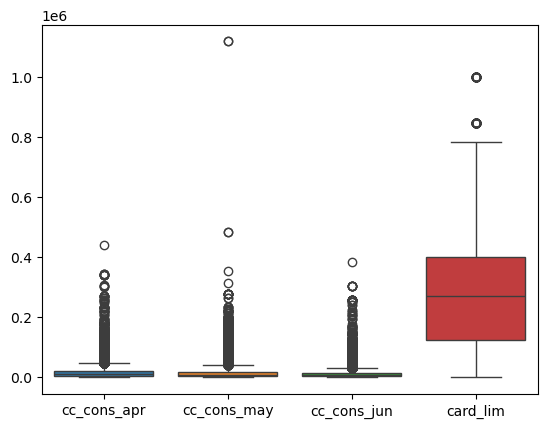

In [328]:
sns.boxplot(new_df[['cc_cons_apr','cc_cons_may','cc_cons_jun','card_lim']])

<Axes: >

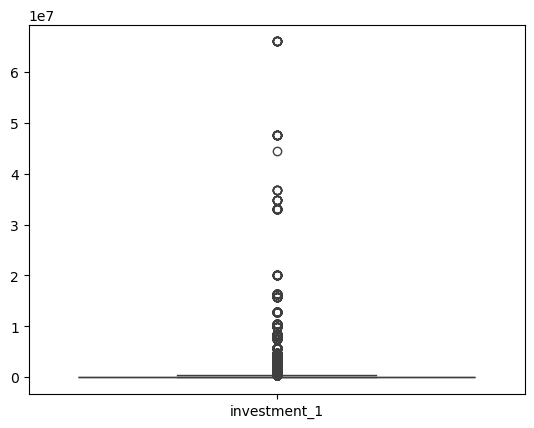

In [329]:
sns.boxplot(new_df[['investment_1']])

<Axes: >

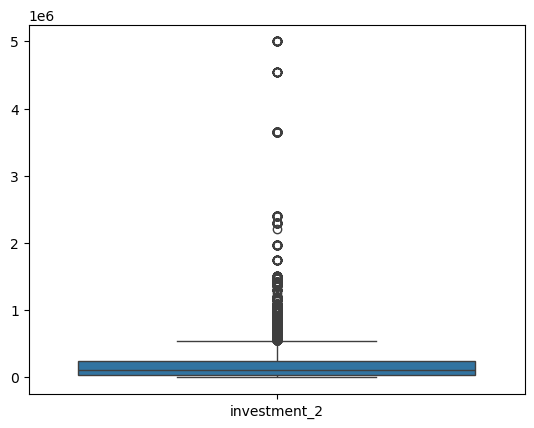

In [330]:
sns.boxplot(new_df[['investment_2']])

<Axes: >

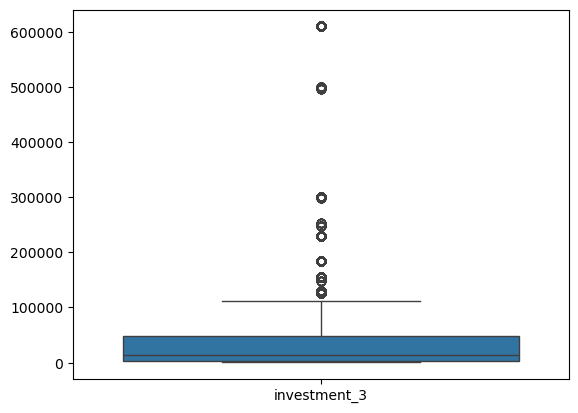

In [331]:
sns.boxplot(new_df[['investment_3']])

<Axes: >

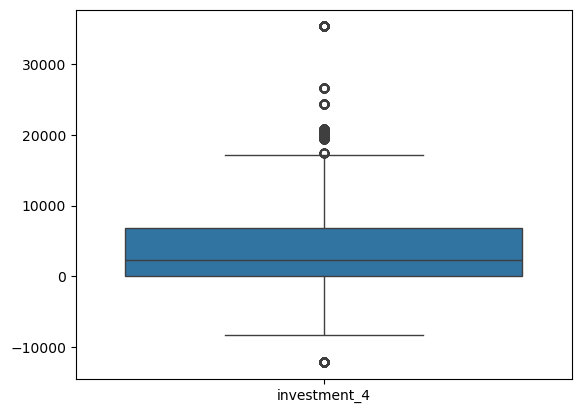

In [332]:
sns.boxplot(new_df[['investment_4']])

All numeric columns have outliers in the upper range except investment_4 which has outliers in bottom range as well.
Lets define a function to detect outliers for each numeric column using IQR method

In [333]:
new_df.columns

Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active',
       'account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons'],
      dtype='object')

In [334]:
# Defining a function to detect outliers in a column using IQR method 

def outlier_count(col):
    for col_name in col:
        iqr = new_df[col_name].quantile(0.75)-new_df[col_name].quantile(0.25)
        minimum = new_df[col_name].quantile(0.25) - 1.5*iqr
        maximum = new_df[col_name].quantile(0.75) + 1.5*iqr
        outlier_min = new_df[new_df[col_name] < minimum].shape[0] 
        outlier_max = new_df[new_df[col_name] > maximum].shape[0]
        print(f'{col_name} has {outlier_min} outliers below minimum and {outlier_max} outliers above maximum')

num_cols = ['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1','investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active','age', 'Emp_Tenure_Years',
       'Tenure_with_Bank','Avg_days_between_transaction']

outlier_count(num_cols)

cc_cons_apr has 0 outliers below minimum and 1631 outliers above maximum
dc_cons_apr has 0 outliers below minimum and 1608 outliers above maximum
cc_cons_may has 0 outliers below minimum and 1607 outliers above maximum
dc_cons_may has 0 outliers below minimum and 1673 outliers above maximum
cc_cons_jun has 0 outliers below minimum and 1590 outliers above maximum
dc_cons_jun has 0 outliers below minimum and 1865 outliers above maximum
cc_count_apr has 0 outliers below minimum and 1181 outliers above maximum
cc_count_may has 0 outliers below minimum and 946 outliers above maximum
cc_count_jun has 0 outliers below minimum and 63 outliers above maximum
dc_count_apr has 0 outliers below minimum and 572 outliers above maximum
dc_count_may has 0 outliers below minimum and 1661 outliers above maximum
dc_count_jun has 0 outliers below minimum and 0 outliers above maximum
card_lim has 0 outliers below minimum and 87 outliers above maximum
investment_1 has 0 outliers below minimum and 2785 outlie

According to our defined Outlier Criteria following columns do not have any outliers outside the minimum and maximum: 
dc_count_jun,
debit_count_jun,
Tenure_with_Bank,
Avg_days_between_transaction

The above columns do not require outlier treatment.

From the boxplot of investment_4 we saw it has negative values which is not possible as investment is never negative. So we clip the range - minimum to 0 and maximum to Q3 + 1.5*IQR

All other numeric columns have outliers above the maximum value (Q3 + 1.5*IQR) so we clip the range accordingly.

In [335]:
# Creating Function for outlier treatment for each numeric column to clip the maximum value at 0.95 percentile
# except for ones that do not have any outliers

def out_treat(col):
    for col_name in col:
        new_df[col_name] = new_df[col_name].clip(upper=new_df[col_name].quantile(0.95))
        return new_df

new_num_cols = ['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'card_lim', 'investment_1','investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active','age', 'Emp_Tenure_Years']

out_treat(new_num_cols)

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,53,...,current,M,30,MEDIUM,7.0,5,956.0,1,20.0,13434.0
11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,4,...,current,M,37,LOW,10.2,8,966.0,1,5.0,449.0
7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,4,...,current,M,33,MEDIUM,3.9,3,505.0,1,15.0,11968.0
14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,24,...,current,M,63,LOW,25.8,6,631.0,0,15.0,32029.0
8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,7,...,saving,M,33,MEDIUM,6.5,7,698.0,0,9.0,16394.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,...,current,M,35,MEDIUM,13.5,1,523.0,0,7.0,NaN
14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,...,current,M,53,MEDIUM,9.9,7,723.0,1,2.0,NaN
18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,...,current,M,62,HIGH,37.8,8,863.0,1,16.0,NaN


In [336]:
## Setting investment_4 minimum value to 0

new_df['investment_4'] = np.where(new_df['investment_4'] < 0, 0, new_df['investment_4'])
new_df['investment_4'].min(), new_df['investment_4'].max()

(0.0, 35346.0)

### Exploratory Data Analysis

In [337]:
new_df.describe()

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,debit_count_jun,max_credit_amount_jun,emi_active,age,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,cc_cons
count,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,2.000000e+04,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,15000.000000
mean,15820.493844,8130.453414,1.618857e+04,7702.427191,12135.806021,7109.790976,41.610670,33.569100,41.470200,17.071700,...,44.529100,5.284985e+04,1.539845e+04,47.672300,15.217250,5.496050,598.941850,0.718000,11.044950,55157.729867
std,15782.852350,14572.188829,2.651003e+04,17892.731800,18790.984789,13313.607868,97.833123,50.316925,46.825658,19.285322,...,35.080453,1.343175e+05,1.202511e+05,30.359771,20.481455,2.870452,220.113637,0.449985,5.480221,97670.972252
min,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,6.000000e-02,0.000000e+00,25.000000,0.500000,1.000000,123.000000,0.000000,2.000000,0.000000
25%,4377.000000,1624.650000,3.635910e+03,1634.260000,2999.075000,1361.100000,5.000000,8.000000,10.000000,2.000000,...,12.000000,1.896450e+04,1.545940e+03,33.000000,5.100000,3.000000,424.000000,0.000000,6.000000,6768.000000
50%,10214.642500,3964.750000,8.638870e+03,3791.720000,6656.800000,3326.000000,10.000000,23.000000,35.000000,7.000000,...,37.000000,3.025000e+04,3.934850e+03,40.000000,9.900000,6.000000,623.000000,1.000000,11.000000,13364.000000
75%,21189.000000,9339.020000,1.867261e+04,8263.590000,14195.727500,7458.820000,44.000000,43.000000,61.000000,25.000000,...,73.000000,5.344900e+04,9.376390e+03,53.000000,18.000000,8.000000,799.000000,1.000000,16.000000,20105.750000
max,59106.728000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,601.000000,653.000000,82.000000,...,133.000000,5.200000e+06,7.447125e+06,223.000000,203.000000,10.000000,974.000000,1.000000,20.000000,408382.000000


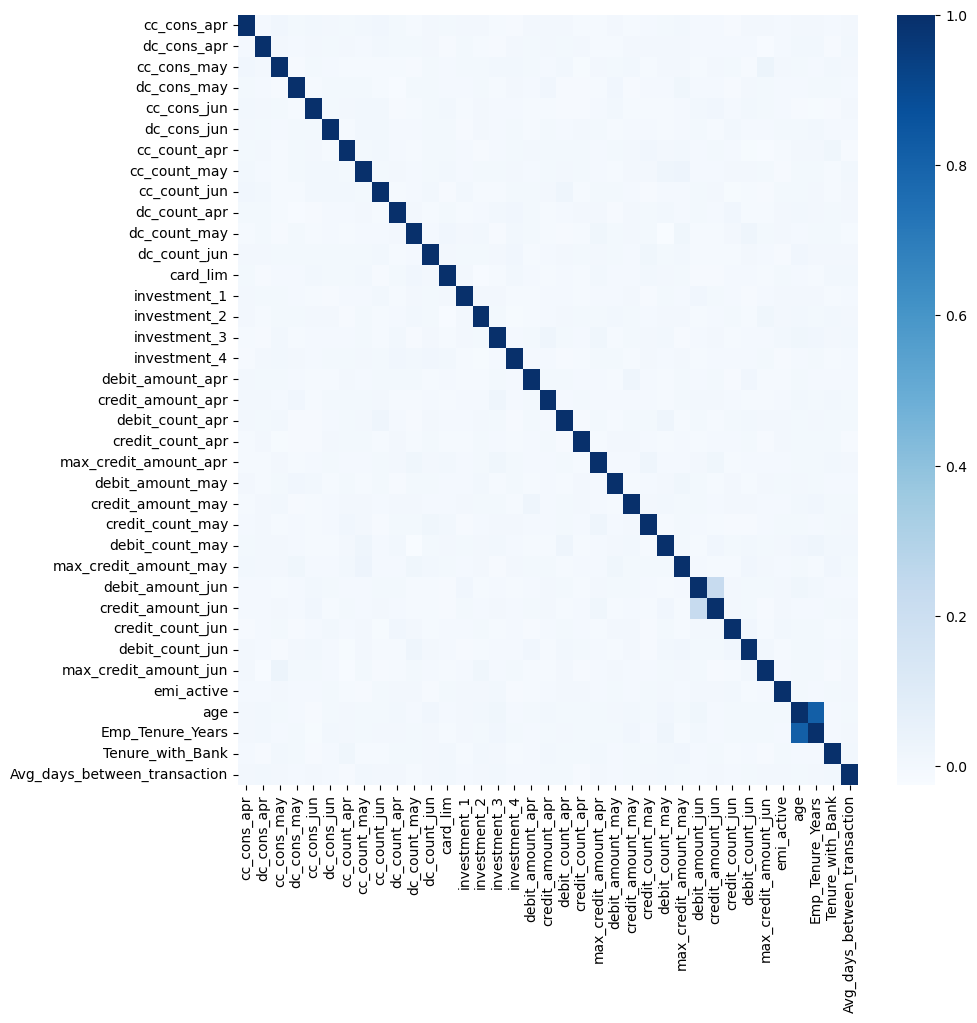

In [338]:
## Plotting Heatmap for numerical columns to check correlation between them

plt.figure(figsize=(10,10))
sns.heatmap(new_df[num_cols].corr(), cmap='Blues')
plt.show()

### From above heatmap for numerical columns we can infer that there is no correlation or very little correlation between majority of the numerical variables except for age and Employee exerpience.
We can drop the age column since Employee Experience already includes the age factor much suited for calculating credit card consumption

In [339]:
## Dropping Age Column

new_df.drop(columns=['age'], inplace=True)
new_df.shape

(20000, 47)

In [340]:
new_df.columns

Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'personal_loan_active', 'vehicle_loan_active',
       'personal_loan_closed', 'vehicle_loan_closed', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active',
       'account_type', 'gender', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'region_code', 'NetBanking_Flag',
       'Avg_days_between_transaction', 'cc_cons'],
      dtype='object')

In [341]:
# Checking Unique Values for categorical Columns
print(new_df['region_code'].value_counts())

region_code
249.0    509
683.0    380
867.0    369
748.0    356
355.0    354
        ... 
398.0      1
484.0      1
608.0      1
436.0      1
857.0      1
Name: count, Length: 210, dtype: int64


In [342]:
print(new_df['NetBanking_Flag'].value_counts())

NetBanking_Flag
1    14360
0     5640
Name: count, dtype: int64


In [343]:
print(new_df['vehicle_loan_closed'].value_counts())

vehicle_loan_closed
1    20000
Name: count, dtype: int64


In [344]:
print(new_df['Income'].value_counts())

Income
MEDIUM    12775
LOW        5612
HIGH       1613
Name: count, dtype: int64


In [345]:
print(new_df['gender'].value_counts())

gender
M    17288
F     2712
Name: count, dtype: int64


In [346]:
print(new_df['account_type'].value_counts())

account_type
current    16926
saving      3074
Name: count, dtype: int64


In [347]:
print(new_df['loan_enq'].value_counts())

loan_enq
Y    20000
Name: count, dtype: int64


In [352]:
# Since all customers have made loan enquiry, Perosnal Loan is active, Vehicle Loan is active, 
# Personal Loan Closed and Vehicle Loan Closed. We can drop these columns

new_df.drop(columns=['loan_enq','personal_loan_active','vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed'], inplace=True)

In [348]:
inc = df.groupby('Income')[['age','Emp_Tenure_Years','card_lim','investment_1','investment_2','investment_3','investment_4']].agg(['mean','std'])
inc

age            Emp_Tenure_Years                  card_lim  \
             mean        std             mean        std           mean   
Income                                                                    
HIGH    47.738376  31.166721        15.586423  22.692004  279513.353999   
LOW     47.876871  30.440706        15.527691  20.627285  277231.699751   
MEDIUM  47.574918  30.223622        15.034108  20.120069  278689.258102   

                        investment_1                 investment_2  \
                  std           mean           std           mean   
Income                                                              
HIGH    182010.021464  566235.135141  2.644745e+06  224454.830298   
LOW     179400.691251  627655.587945  3.138918e+06  233259.627354   
MEDIUM  181212.268766  577834.335960  2.880562e+06  233906.604335   

                       investment_3               investment_4               
                  std          mean           std         mean          std  
Income                                                                       
HIGH    377932.239621  43852.311154  88956.099828  3378.834683  7236.772597  
LOW     406863.689103  43288.836674  85627.301828  3499.598695  7530.306001  
MEDIUM  411419.338385  45274.408791  89684.951452  3508.158557  7315.217143

From above Crosstab we can infer that there is Income has no effect on Age, Experience and Investments

### Feature Engineering

In [349]:
# We take average of Credit Card Consumption of previous 3 months

new_df['cc_cons_avg_prev'] = (new_df['cc_cons_apr'] + new_df['cc_cons_may'] + new_df['cc_cons_jun']) / 3
new_df['cc_cons_avg_prev']

ID
17051     3035.310000
11491    29625.846667
7433     17809.550000
14606    19525.163333
8381     11974.150000
             ...     
12512    17464.370000
14224     9749.816667
18740     4909.131667
18134    13399.753333
12413    10121.546667
Name: cc_cons_avg_prev, Length: 20000, dtype: float64

In [350]:
# We combine individual investments by summing

new_df['total_inv'] = new_df['investment_1'] + new_df['investment_2'] + new_df['investment_3'] + new_df['investment_4']
new_df['total_inv']

ID
17051     443005.20
11491    6422304.00
7433      209702.60
14606     460017.00
8381       31095.73
            ...    
12512    1047407.90
14224    2218185.90
18740     237016.03
18134      61807.56
12413    1685032.80
Name: total_inv, Length: 20000, dtype: float64

In [351]:
# We combine debit amount and credit amount for each month into net credit for each month 

new_df['net_cr_apr'] = new_df['credit_amount_apr'] - new_df['debit_amount_apr']
new_df['net_cr_may'] = new_df['credit_amount_may'] - new_df['debit_amount_may']
new_df['net_cr_jun'] = new_df['credit_amount_jun'] - new_df['debit_amount_jun']

In [355]:
# create calculated fields
# Total dc and cc cons for 3 months
new_df['cc_cons_sum']= new_df['cc_cons_apr'] + new_df['cc_cons_may'] + new_df['cc_cons_jun']
new_df['dc_cons_sum']= new_df['dc_cons_apr']+ new_df['dc_cons_may'] + new_df['dc_cons_jun']

# Total dc and cc count for 3 months
new_df['cc_count_sum'] = new_df['cc_count_apr'] + new_df['cc_count_may'] + new_df['cc_count_jun']
new_df['dc_count_sum'] = new_df['dc_count_apr'] + new_df['dc_count_may'] + new_df['dc_count_jun']

# Total dc and cc cons average for 3 months
new_df['cc_cons_avg'] = 0
new_df.loc[new_df.cc_count_sum != 0,'cc_cons_avg'] = new_df.loc[new_df.cc_count_sum != 0,'cc_cons_sum']/new_df.loc[new_df.cc_count_sum != 0,'cc_count_sum']
new_df['dc_cons_avg'] = 0
new_df.loc[new_df.dc_count_sum != 0,'dc_cons_avg'] = new_df.loc[new_df.dc_count_sum != 0,'dc_cons_sum']/new_df.loc[new_df.dc_count_sum != 0,'dc_count_sum']

# Average dc cons for each month
new_df['dc_cons_apr_avg']= 0
new_df.loc[new_df.dc_count_apr != 0,'dc_cons_apr_avg'] = new_df.loc[new_df.dc_count_apr != 0,'dc_cons_apr']/new_df.loc[new_df.dc_count_apr != 0,'dc_count_apr']
new_df['dc_cons_may_avg'] = 0
new_df.loc[new_df.dc_count_may != 0,'dc_cons_may_avg'] = new_df.loc[new_df.dc_count_may != 0,'dc_cons_may']/new_df.loc[new_df.dc_count_may != 0,'dc_count_may']
new_df['dc_cons_jun_avg']= 0
new_df.loc[new_df.dc_count_jun != 0,'dc_cons_jun_avg'] = new_df.loc[new_df.dc_count_jun != 0,'dc_cons_jun']/new_df.loc[new_df.dc_count_jun != 0,'dc_count_jun']

# Average cc cons for each month
new_df['cc_cons_apr_avg'] = 0
new_df.loc[new_df.cc_count_apr != 0,'cc_cons_apr_avg'] = new_df.loc[new_df.cc_count_apr != 0,'cc_cons_apr']/new_df.loc[new_df.cc_count_apr != 0,'cc_count_apr']
new_df['cc_cons_may_avg'] = 0
new_df.loc[new_df.cc_count_may != 0,'cc_cons_may_avg'] = new_df.loc[new_df.cc_count_may != 0,'cc_cons_may']/new_df.loc[new_df.cc_count_may != 0,'cc_count_may']
new_df['cc_cons_jun_avg'] = 0
new_df.loc[new_df.cc_count_jun != 0,'cc_cons_jun_avg'] = new_df.loc[new_df.cc_count_jun != 0,'cc_cons_jun']/new_df.loc[new_df.cc_count_jun != 0,'cc_count_jun']

In [356]:
# Total credit and debit amount for 3 months
new_df['credit_amount_sum'] = new_df.credit_amount_apr + new_df.credit_amount_may + new_df.credit_amount_jun
new_df['debit_amount_sum'] = new_df.debit_amount_apr + new_df.debit_amount_may + new_df.debit_amount_jun

# Total credit and debit count for 3 months
new_df['credit_count_sum'] = new_df.credit_count_apr + new_df.credit_count_may + new_df.credit_count_jun
new_df['debit_count_sum'] = new_df.debit_count_apr + new_df.debit_count_may + new_df.debit_count_jun

# Total credit and debit amount average for 3 months
new_df['credit_amount_avg'] = 0
new_df.loc[new_df.credit_count_sum != 0,'credit_amount_avg'] = new_df.loc[new_df.credit_count_sum != 0,'credit_amount_sum']/new_df.loc[new_df.credit_count_sum != 0,'credit_count_sum']
new_df['debit_amount_avg'] = 0
new_df.loc[new_df.debit_count_sum != 0,'debit_amount_avg'] = new_df.loc[new_df.debit_count_sum != 0,'debit_amount_sum']/new_df.loc[new_df.debit_count_sum != 0,'debit_count_sum']

# average debit amount for each month
new_df['debit_amount_apr_avg']= 0
new_df.loc[new_df.debit_count_apr != 0,'debit_amount_apr_avg'] = new_df.loc[new_df.debit_count_apr != 0,'debit_amount_apr']/new_df.loc[new_df.debit_count_apr != 0,'debit_count_apr']
new_df['debit_amount_may_avg'] = 0
new_df.loc[new_df.debit_count_may != 0,'debit_amount_may_avg'] = new_df.loc[new_df.debit_count_may != 0,'debit_amount_may']/new_df.loc[new_df.debit_count_may != 0,'debit_count_may']
new_df['debit_amount_jun_avg'] = 0
new_df.loc[new_df.debit_count_jun != 0,'debit_amount_jun_avg'] = new_df.loc[new_df.debit_count_jun != 0,'debit_amount_jun']/new_df.loc[new_df.debit_count_jun != 0,'debit_count_jun']

# average credit amount for each month
new_df['credit_amount_apr_avg'] = 0
new_df.loc[new_df.credit_count_apr != 0,'credit_amount_apr_avg'] = new_df.loc[new_df.credit_count_apr != 0,'credit_amount_apr']/new_df.loc[new_df.credit_count_apr != 0,'credit_count_apr']
new_df['credit_amount_may_avg'] = 0
new_df.loc[new_df.credit_count_may != 0,'credit_amount_may_avg'] = new_df.loc[new_df.credit_count_may != 0,'credit_amount_may']/new_df.loc[new_df.credit_count_may != 0,'credit_count_may']
new_df['credit_amount_jun_avg'] = 0
new_df.loc[new_df.credit_count_jun != 0,'credit_amount_jun_avg'] = new_df.loc[new_df.credit_count_jun != 0,'credit_amount_jun']/new_df.loc[new_df.credit_count_jun != 0,'credit_count_jun']

In [357]:
# percentage credit amount per month
new_df['perc_credit_amount_apr'] = 0
new_df.loc[new_df.max_credit_amount_apr!= 0,'perc_credit_amount_apr'] = new_df.loc[new_df.max_credit_amount_apr!= 0,'credit_amount_apr']/new_df.loc[new_df.max_credit_amount_apr!= 0,'max_credit_amount_apr']
new_df['perc_credit_amount_may'] = 0
new_df.loc[new_df.max_credit_amount_may!= 0,'perc_credit_amount_may'] = new_df.loc[new_df.max_credit_amount_may!= 0,'credit_amount_may']/new_df.loc[new_df.max_credit_amount_may!= 0,'max_credit_amount_may']
new_df['perc_credit_amount_jun'] = 0
new_df.loc[new_df.max_credit_amount_jun!= 0,'perc_credit_amount_jun'] = new_df.loc[new_df.max_credit_amount_jun!= 0,'credit_amount_jun']/new_df.loc[new_df.max_credit_amount_jun!= 0,'max_credit_amount_jun']

In [358]:
# proportion of debit and credit consumptions per month
new_df['cc_cons_apr_prop'] = 0
new_df.loc[new_df.cc_cons_sum!= 0,'cc_cons_apr_prop'] = new_df.loc[new_df.cc_cons_sum!= 0,'cc_cons_apr']/new_df.loc[new_df.cc_cons_sum != 0,'cc_cons_sum']
new_df['cc_cons_may_prop'] = 0
new_df.loc[new_df.cc_cons_sum != 0,'cc_cons_may_prop'] = new_df.loc[new_df.cc_cons_sum != 0,'cc_cons_may']/new_df.loc[new_df.cc_cons_sum != 0,'cc_cons_sum']
new_df['cc_cons_jun_prop'] = 0
new_df.loc[new_df.cc_cons_sum != 0,'cc_cons_jun_prop'] = new_df.loc[new_df.cc_cons_sum != 0,'cc_cons_jun']/new_df.loc[new_df.cc_cons_sum != 0,'cc_cons_sum']
new_df['dc_cons_apr_prop'] = 0
new_df.loc[new_df.dc_cons_sum != 0,'dc_cons_apr_prop'] = new_df.loc[new_df.dc_cons_sum != 0,'dc_cons_apr']/new_df.loc[new_df.dc_cons_sum != 0,'dc_cons_sum']
new_df['dc_cons_may_prop'] = 0
new_df.loc[new_df.dc_cons_sum != 0,'dc_cons_may_prop'] = new_df.loc[new_df.dc_cons_sum != 0,'dc_cons_may']/new_df.loc[new_df.dc_cons_sum != 0,'dc_cons_sum']
new_df['dc_cons_jun_prop'] = 0
new_df.loc[new_df.dc_cons_sum != 0,'dc_cons_jun_prop'] = new_df.loc[new_df.dc_cons_sum != 0,'dc_cons_jun']/new_df.loc[new_df.dc_cons_sum != 0,'dc_cons_sum']

In [ ]:
# debit by credit cons and amount ratios
new_df['d_by_c_cons_ratio_apr'] = 0
new_df.loc[new_df.cc_cons_apr != 0,'d_by_c_cons_ratio_apr'] = new_df.loc[new_df.cc_cons_apr != 0,'dc_cons_apr']/new_df.loc[new_df.cc_cons_apr != 0,'cc_cons_apr']
new_df['d_by_c_cons_ratio_may'] = 0
new_df.loc[new_df.cc_cons_may != 0,'d_by_c_cons_ratio_may'] = new_df.loc[new_df.cc_cons_may != 0,'dc_cons_may']/new_df.loc[new_df.cc_cons_may != 0,'cc_cons_may']
new_df['d_by_c_cons_ratio_jun'] = 0
new_df.loc[new_df.cc_cons_jun != 0,'d_by_c_cons_ratio_jun'] = new_df.loc[new_df.cc_cons_jun != 0,'dc_cons_jun']/new_df.loc[new_df.cc_cons_jun != 0,'cc_cons_jun']
new_df['d_by_c_amount_ratio_apr'] = 0
new_df.loc[new_df.credit_amount_apr != 0,'d_by_c_amount_ratio_apr'] = new_df.loc[new_df.credit_amount_apr != 0,'debit_amount_apr']/new_df.loc[new_df.credit_amount_apr != 0,'credit_amount_apr']
new_df['d_by_c_amount_ratio_may'] = 0
new_df.loc[new_df.credit_amount_may != 0,'d_by_c_amount_ratio_may'] = new_df.loc[new_df.credit_amount_may != 0,'debit_amount_may']/new_df.loc[new_df.credit_amount_may != 0,'credit_amount_may']
new_df['d_by_c_amount_ratio_jun'] = 0
new_df.loc[new_df.credit_amount_jun != 0,'d_by_c_amount_ratio_jun'] = new_df.loc[new_df.credit_amount_jun != 0,'debit_amount_jun']/new_df.loc[new_df.credit_amount_jun != 0,'credit_amount_jun']

In [359]:
new_df.columns

Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'account_type', 'gender',
       'Income', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons',
       'cc_cons_avg_prev', 'total_inv', 'net_cr_apr', 'net_cr_may',
       'net_cr_jun', 'cc_cons_sum', 'dc_cons_sum', 'cc_count_sum',
       'dc_count_sum', 'cc_cons_avg',

In [360]:
## Lets split data we will be using for training with data we will be using for prediction

train_df = new_df[new_df.cc_cons.notna()]
test_df = new_df[new_df.cc_cons.isna()]

train_df.shape, test_df.shape

((15000, 80), (5000, 80))

In [361]:
train_df.columns

Index(['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'account_type', 'gender',
       'Income', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction', 'cc_cons',
       'cc_cons_avg_prev', 'total_inv', 'net_cr_apr', 'net_cr_may',
       'net_cr_jun', 'cc_cons_sum', 'dc_cons_sum', 'cc_count_sum',
       'dc_count_sum', 'cc_cons_avg',

In [362]:
## Lets split our dependent and independent varaibles and then do a Train-Test Split for training and validating out Regressor model

X = train_df[['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'account_type', 'gender',
       'Income', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction',
       'cc_cons_avg_prev', 'total_inv', 'net_cr_apr', 'net_cr_may',            
       'net_cr_jun', 'cc_cons_sum', 'dc_cons_sum', 'cc_count_sum',
       'dc_count_sum', 'cc_cons_avg', 'dc_cons_avg', 'dc_cons_apr_avg',
       'dc_cons_may_avg', 'dc_cons_jun_avg', 'cc_cons_apr_avg',
       'cc_cons_may_avg', 'cc_cons_jun_avg', 'credit_amount_sum',
       'debit_amount_sum', 'credit_count_sum', 'debit_count_sum',
       'credit_amount_avg', 'debit_amount_avg', 'debit_amount_apr_avg',
       'debit_amount_may_avg', 'debit_amount_jun_avg', 'credit_amount_apr_avg',
       'credit_amount_may_avg', 'credit_amount_jun_avg',
       'perc_credit_amount_apr', 'perc_credit_amount_may',
       'perc_credit_amount_jun', 'cc_cons_apr_prop', 'cc_cons_may_prop',
       'cc_cons_jun_prop', 'dc_cons_apr_prop', 'dc_cons_may_prop',
       'dc_cons_jun_prop']]

y = train_df['cc_cons']

X.shape, y.shape

((15000, 79), (15000,))

In [363]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [364]:
## Segregating numeric columns of Training Data

train_num_df = X_train[['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'Emp_Tenure_Years', 'Tenure_with_Bank',
        'Avg_days_between_transaction','cc_cons_avg_prev', 'total_inv', 'net_cr_apr', 'net_cr_may',
       'net_cr_jun', 'cc_cons_sum', 'dc_cons_sum', 'cc_count_sum',
       'dc_count_sum', 'cc_cons_avg', 'dc_cons_avg', 'dc_cons_apr_avg',
       'dc_cons_may_avg', 'dc_cons_jun_avg', 'cc_cons_apr_avg',
       'cc_cons_may_avg', 'cc_cons_jun_avg', 'credit_amount_sum',
       'debit_amount_sum', 'credit_count_sum', 'debit_count_sum',
       'credit_amount_avg', 'debit_amount_avg', 'debit_amount_apr_avg',
       'debit_amount_may_avg', 'debit_amount_jun_avg', 'credit_amount_apr_avg',
       'credit_amount_may_avg', 'credit_amount_jun_avg',
       'perc_credit_amount_apr', 'perc_credit_amount_may',
       'perc_credit_amount_jun', 'cc_cons_apr_prop', 'cc_cons_may_prop',
       'cc_cons_jun_prop', 'dc_cons_apr_prop', 'dc_cons_may_prop',
       'dc_cons_jun_prop']]

## Segregating categorical columns of Training Data
train_cat_df = X_train[['account_type', 'gender', 'Income','region_code', 'NetBanking_Flag']]

In [365]:
## Importing Scaling Library
from sklearn.preprocessing import RobustScaler

## Scaling Train Data Numeric Columns
scl = RobustScaler().fit(train_num_df)
train_num_df_scl = pd.DataFrame(scl.transform(train_num_df), columns =train_num_df.columns )
train_num_df_scl

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,credit_amount_jun_avg,perc_credit_amount_apr,perc_credit_amount_may,perc_credit_amount_jun,cc_cons_apr_prop,cc_cons_may_prop,cc_cons_jun_prop,dc_cons_apr_prop,dc_cons_may_prop,dc_cons_jun_prop
0,-0.482566,-0.073367,-0.495492,13.833931,0.735720,-0.094666,0.846154,0.114286,0.615385,-0.260870,...,0.800807,-0.548478,0.066201,-0.230292,-0.526955,-0.599441,1.798293,-0.607292,1.642882,-0.564341
1,-0.151273,-0.195971,-0.247509,-0.223569,0.528275,0.452158,-0.230769,0.371429,-0.096154,0.739130,...,-0.222191,-0.491487,0.807669,-0.099243,-0.068148,-0.245897,0.830703,-0.158960,-0.160715,0.820324
2,-0.093637,-0.018639,0.157059,-0.206224,0.753345,-0.080715,-0.102564,0.314286,0.346154,-0.260870,...,-0.311344,3.626713,-0.168916,0.234539,-0.208081,0.077373,0.630372,0.299694,-0.022468,0.167960
3,0.525424,-0.262336,-0.381625,1.157034,1.146657,-0.459367,0.051282,2.000000,-0.115385,1.217391,...,-0.219536,-0.186346,1.116315,0.563582,0.305710,-0.568578,0.744183,-0.354502,1.358619,-0.547890
4,-0.182293,-0.124606,2.700685,-0.474582,-0.539310,1.299496,0.384615,-0.371429,-0.230769,0.043478,...,0.244480,-0.523526,0.140602,-0.197330,-0.509851,1.495247,-0.629944,-0.219604,-0.577914,1.322706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-0.163574,0.840632,0.674475,0.337561,-0.132458,-0.341620,-0.051282,2.171429,-0.365385,0.478261,...,-0.253931,-0.300066,-0.237333,-0.486334,-0.237026,0.810239,-0.176461,0.702517,0.151271,-0.459571
11996,0.254086,0.196403,0.375894,-0.325703,-0.137599,0.182434,-0.102564,1.771429,-0.596154,-0.217391,...,1.370719,-0.521066,0.853138,-0.359863,0.223669,0.353418,-0.215053,0.420915,-0.334890,0.359553
11997,2.861145,0.909102,1.738955,0.224275,0.007741,-0.295436,-0.102564,-0.028571,-0.576923,0.043478,...,-0.396125,-0.091451,0.434449,-0.505484,0.596522,0.169080,-0.459333,0.766313,0.043952,-0.418304
11998,0.408094,3.905939,-0.490333,-0.512802,1.832560,-0.315802,0.871795,-0.457143,1.923077,-0.260870,...,2.961923,0.693891,0.240089,-0.115573,0.100133,-0.678726,1.122263,1.539405,-0.663075,-0.537313


In [366]:
train_cat_df.dtypes

train_cat_df['NetBanking_Flag'] = pd.to_numeric(train_cat_df['NetBanking_Flag'], downcast='integer')
train_cat_df['region_code'] = pd.to_numeric(train_cat_df['region_code'], downcast='integer')
train_cat_df['Income'] = train_cat_df['Income'].astype('str')
train_cat_df['gender'] = train_cat_df['gender'].astype('str')
train_cat_df['account_type'] = train_cat_df['account_type'].astype('str')

In [367]:
## Importing One Hot Encoding Library
from sklearn.preprocessing import OneHotEncoder

## Encoding Categorical Columns in Train Data
enc = OneHotEncoder(drop='first', handle_unknown='ignore').fit(train_cat_df)
train_cat_df_enc = pd.DataFrame(enc.transform(train_cat_df).toarray(), columns=enc.get_feature_names_out())
train_cat_df_enc

,account_type_saving,gender_M,Income_LOW,Income_MEDIUM,region_code_233,region_code_243,region_code_244,region_code_245,region_code_247,region_code_248,...,region_code_958,region_code_963,region_code_964,region_code_965,region_code_966,region_code_968,region_code_969,region_code_970,region_code_974,NetBanking_Flag_1
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11996,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11997,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11998,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [368]:
# Concating Encoded and Scaled data to form X_train data

X_train_fnl = pd.concat([train_num_df_scl, train_cat_df_enc], axis=1)
X_train_fnl

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,region_code_958,region_code_963,region_code_964,region_code_965,region_code_966,region_code_968,region_code_969,region_code_970,region_code_974,NetBanking_Flag_1
0,-0.482566,-0.073367,-0.495492,13.833931,0.735720,-0.094666,0.846154,0.114286,0.615385,-0.260870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.151273,-0.195971,-0.247509,-0.223569,0.528275,0.452158,-0.230769,0.371429,-0.096154,0.739130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.093637,-0.018639,0.157059,-0.206224,0.753345,-0.080715,-0.102564,0.314286,0.346154,-0.260870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.525424,-0.262336,-0.381625,1.157034,1.146657,-0.459367,0.051282,2.000000,-0.115385,1.217391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.182293,-0.124606,2.700685,-0.474582,-0.539310,1.299496,0.384615,-0.371429,-0.230769,0.043478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,-0.163574,0.840632,0.674475,0.337561,-0.132458,-0.341620,-0.051282,2.171429,-0.365385,0.478261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11996,0.254086,0.196403,0.375894,-0.325703,-0.137599,0.182434,-0.102564,1.771429,-0.596154,-0.217391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11997,2.861145,0.909102,1.738955,0.224275,0.007741,-0.295436,-0.102564,-0.028571,-0.576923,0.043478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11998,0.408094,3.905939,-0.490333,-0.512802,1.832560,-0.315802,0.871795,-0.457143,1.923077,-0.260870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [369]:
## Segregating numeric columns of Testing Data
test_num_df = X_test[['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'Emp_Tenure_Years', 'Tenure_with_Bank',
        'Avg_days_between_transaction','cc_cons_avg_prev', 'total_inv', 'net_cr_apr', 'net_cr_may',
       'net_cr_jun', 'cc_cons_sum', 'dc_cons_sum', 'cc_count_sum',
       'dc_count_sum', 'cc_cons_avg', 'dc_cons_avg', 'dc_cons_apr_avg',
       'dc_cons_may_avg', 'dc_cons_jun_avg', 'cc_cons_apr_avg',
       'cc_cons_may_avg', 'cc_cons_jun_avg', 'credit_amount_sum',
       'debit_amount_sum', 'credit_count_sum', 'debit_count_sum',
       'credit_amount_avg', 'debit_amount_avg', 'debit_amount_apr_avg',
       'debit_amount_may_avg', 'debit_amount_jun_avg', 'credit_amount_apr_avg',
       'credit_amount_may_avg', 'credit_amount_jun_avg',
       'perc_credit_amount_apr', 'perc_credit_amount_may',
       'perc_credit_amount_jun', 'cc_cons_apr_prop', 'cc_cons_may_prop',
       'cc_cons_jun_prop', 'dc_cons_apr_prop', 'dc_cons_may_prop',
       'dc_cons_jun_prop']]

## Segregating categorical columns of Testing Data
test_cat_df = X_test[['account_type', 'gender', 'Income','region_code', 'NetBanking_Flag']]

In [370]:
## Scaling Test Data Numeric Columns
test_num_df_scl = pd.DataFrame(scl.transform(test_num_df), columns =test_num_df.columns )
test_num_df_scl

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,credit_amount_jun_avg,perc_credit_amount_apr,perc_credit_amount_may,perc_credit_amount_jun,cc_cons_apr_prop,cc_cons_may_prop,cc_cons_jun_prop,dc_cons_apr_prop,dc_cons_may_prop,dc_cons_jun_prop
0,0.715369,0.256424,2.390876,0.214637,-0.307034,-0.264968,-0.230769,-0.628571,-0.153846,-0.217391,...,1.357528,0.260514,0.023829,1.257941,-0.048803,0.913377,-0.525255,0.401724,0.314796,-0.296891
1,-0.519199,-0.176758,-0.524998,0.478840,0.053610,0.848085,-0.205128,-0.428571,1.480769,2.173913,...,0.451833,-0.303305,2.934923,-0.076421,-0.420600,-0.594273,1.662245,-0.349197,0.256338,0.596053
2,0.189205,0.188788,-0.203231,0.348192,-0.203710,0.251228,0.000000,-0.485714,-0.615385,1.608696,...,2.416760,-0.260307,33.118133,1.699764,0.588674,-0.130630,-0.105291,0.090641,0.227881,0.138429
3,2.355234,1.791533,-0.404087,0.106607,1.081423,2.700603,-0.230769,0.228571,-0.576923,0.565217,...,-0.336411,-0.520257,0.042702,0.192326,0.887897,-0.651996,0.127834,0.297633,-0.430951,0.596344
4,-0.192209,0.636335,0.218276,0.760857,-0.357953,0.419872,0.384615,1.371429,0.942308,-0.086957,...,-0.381375,-0.527057,-0.179825,-0.412027,-0.024148,0.693050,-0.302207,0.197079,0.230338,0.017941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.691616,0.780812,0.496119,0.680410,1.710853,0.168143,-0.102564,0.085714,-0.423077,2.000000,...,1.937091,-0.219242,-0.213196,2.308765,0.016543,-0.085113,0.542316,0.350883,0.212426,-0.133778
2996,-0.428085,0.228027,1.516978,0.983687,0.647097,3.077559,1.358974,0.571429,0.211538,-0.260870,...,-0.322952,0.435332,-0.038232,4.933137,-0.659583,0.944568,0.186096,-0.336755,-0.032629,0.883698
2997,1.508841,-0.204767,-0.413143,-0.099138,-0.468611,-0.242678,2.333333,0.000000,0.288462,1.391304,...,-0.389334,-0.184109,0.681693,14.217039,1.390017,-0.590981,-0.556556,0.075976,0.373095,0.003200
2998,-0.475777,-0.277050,-0.330993,-0.437075,0.865946,0.897508,1.358974,-0.600000,-0.500000,0.130435,...,0.234092,-0.065321,0.007689,-0.092377,-0.566899,-0.330397,1.537962,-0.318499,-0.491443,1.342073


In [371]:
## Encoding Categorical Columns in Test Data

test_cat_df['NetBanking_Flag'] = pd.to_numeric(test_cat_df['NetBanking_Flag'], downcast='integer')
test_cat_df['region_code'] = pd.to_numeric(test_cat_df['region_code'], downcast='integer')
test_cat_df['Income'] = test_cat_df['Income'].astype('str')
test_cat_df['gender'] = test_cat_df['gender'].astype('str')
test_cat_df['account_type'] = test_cat_df['account_type'].astype('str')

test_cat_df_enc = pd.DataFrame(enc.transform(test_cat_df).toarray(), columns=enc.get_feature_names_out())
test_cat_df_enc

,account_type_saving,gender_M,Income_LOW,Income_MEDIUM,region_code_233,region_code_243,region_code_244,region_code_245,region_code_247,region_code_248,...,region_code_958,region_code_963,region_code_964,region_code_965,region_code_966,region_code_968,region_code_969,region_code_970,region_code_974,NetBanking_Flag_1
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2998,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [372]:
# Concating Encoded and Scaled data to form X_test data

X_test_fnl = pd.concat([test_num_df_scl, test_cat_df_enc], axis=1)
X_test_fnl

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,region_code_958,region_code_963,region_code_964,region_code_965,region_code_966,region_code_968,region_code_969,region_code_970,region_code_974,NetBanking_Flag_1
0,0.715369,0.256424,2.390876,0.214637,-0.307034,-0.264968,-0.230769,-0.628571,-0.153846,-0.217391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.519199,-0.176758,-0.524998,0.478840,0.053610,0.848085,-0.205128,-0.428571,1.480769,2.173913,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.189205,0.188788,-0.203231,0.348192,-0.203710,0.251228,0.000000,-0.485714,-0.615385,1.608696,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.355234,1.791533,-0.404087,0.106607,1.081423,2.700603,-0.230769,0.228571,-0.576923,0.565217,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.192209,0.636335,0.218276,0.760857,-0.357953,0.419872,0.384615,1.371429,0.942308,-0.086957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.691616,0.780812,0.496119,0.680410,1.710853,0.168143,-0.102564,0.085714,-0.423077,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2996,-0.428085,0.228027,1.516978,0.983687,0.647097,3.077559,1.358974,0.571429,0.211538,-0.260870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,1.508841,-0.204767,-0.413143,-0.099138,-0.468611,-0.242678,2.333333,0.000000,0.288462,1.391304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2998,-0.475777,-0.277050,-0.330993,-0.437075,0.865946,0.897508,1.358974,-0.600000,-0.500000,0.130435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
## Taking Log Transformation of Target Variable in test and train for Scaling

y_train_log = np.where(y_train==0, 1, y_train)
y_train_log = np.log(y_train_log)
y_train_log

y_test_log = np.where(y_test==0, 1, y_test)
y_test_log = np.log(y_test_log)
y_test_log

## Model Selection and Evaluation
### 1. Linear Regression

In [373]:
## Importing Library for Linear Regression
from sklearn.linear_model import LinearRegression

## Importing Libraries for Error Calculation
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [415]:
lin_model = LinearRegression(fit_intercept=False)
lin_model_fit = lin_model.fit(X_train_fnl, y_train_log)
preds_train_lin_model = lin_model_fit.predict(X_train_fnl)
mse_lin_train = mean_squared_error(preds_train_lin_model, y_train_log)
mae_lin_train = mean_absolute_error(preds_train_lin_model, y_train_log)
print('Mean Squared Error for training data is : ',mse_lin_train)
print('Mean Absolute Error for training data is : ',mae_lin_train)


preds_test_lin_model = lin_model_fit.predict(X_test_fnl)
mse_lin_test = mean_squared_error(preds_test_lin_model, y_test_log)
mae_lin_test = mean_absolute_error(preds_test_lin_model, y_test_log)
print('Mean Squared Error for testing data is : ',mse_lin_test)
print('Mean Absolute Error for testing data is : ',mae_lin_test)


Mean Squared Error for training data is :  2.5417432544766294
Mean Absolute Error for training data is :  1.1597132695974788
Mean Squared Error for testing data is :  2.6326716505337195
Mean Absolute Error for testing data is :  1.172763753908434


### 2. K Neighbor Regressor

In [416]:
## Importing Library for K-Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
kn_regressor = KNeighborsRegressor(n_neighbors =10, weights='uniform').fit(X_train_fnl,y_train_log)
preds_train_kn_reg = kn_regressor.predict(X_train_fnl)
mse_knn_train = mean_squared_error(preds_train_kn_reg, y_train_log)
mae_knn_train = mean_absolute_error(preds_train_kn_reg, y_train_log)
print('Mean Squared Error for training data is : ',mse_knn_train)
print('Mean Absolute Error for training data is : ',mae_knn_train)


preds_test_kn_reg = kn_regressor.predict(X_test_fnl)
mse_knn_test = mean_squared_error(preds_test_kn_reg, y_test_log)
mae_knn_test = mean_absolute_error(preds_test_kn_reg, y_test_log)
print('Mean Squared Error for testing data is : ',mse_knn_test)
print('Mean Absolute Error for testing data is : ',mae_knn_test)




Mean Squared Error for training data is :  2.3552552308603105
Mean Absolute Error for training data is :  1.156100459040723
Mean Squared Error for testing data is :  2.9036303915760513
Mean Absolute Error for testing data is :  1.2736374812581488


### 3. Decision Tree Regressor

In [408]:
## Importing Decision tree Regressor Library
from sklearn.tree import DecisionTreeRegressor

# Importing Library for Random Search Cross Validation
from sklearn.model_selection import RandomizedSearchCV

dt_model= DecisionTreeRegressor()
param_grid=dict(max_depth=range(5,20),min_samples_split=range(50,200,10),min_samples_leaf=range(25,100,10),max_leaf_nodes=range(8,32,2))
grid=RandomizedSearchCV(dt_model,param_grid,scoring='neg_mean_squared_error',n_jobs=4,cv=5,random_state=42)
grid.fit(X_train_fnl,y_train_log)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=4,
                   param_distributions={'max_depth': range(5, 20),
                                        'max_leaf_nodes': range(8, 32, 2),
                                        'min_samples_leaf': range(25, 100, 10),
                                        'min_samples_split': range(50, 200, 10)},
                   random_state=42, scoring='neg_mean_squared_error')

In [409]:
grid.best_params_

{'min_samples_split': 60,
 'min_samples_leaf': 95,
 'max_leaf_nodes': 8,
 'max_depth': 8}

In [413]:
dt_best_model=grid.best_estimator_

preds_train_dt = dt_best_model.predict(X_train_fnl)
mse_dt_train = mean_squared_error(preds_train_dt, y_train_log)
mae_dt_train = mean_absolute_error(preds_train_dt, y_train_log)
print('Mean Squared Error for training data is : ',mse_dt_train)
print('Mean Absolute Error for training data is : ',mae_dt_train)


preds_test_dt = dt_best_model.predict(X_test_fnl)
mse_dt_test = mean_squared_error(preds_test_dt, y_test_log)
mae_dt_test = mean_absolute_error(preds_test_dt, y_test_log)
print('Mean Squared Error for testing data is : ',mse_dt_test)
print('Mean Absolute Error for testing data is : ',mae_dt_test)


Mean Squared Error for training data is :  2.578199933001324
Mean Absolute Error for training data is :  1.1592856429345724
Mean Squared Error for testing data is :  2.6275540446891856
Mean Absolute Error for testing data is :  1.165279834629462


### Lets Train the KNN Classifier Model on the whole Training data before the split

In [422]:
X_train_1 = pd.concat([X_train_fnl,X_test_fnl], axis=0)
X_train_1

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,region_code_958,region_code_963,region_code_964,region_code_965,region_code_966,region_code_968,region_code_969,region_code_970,region_code_974,NetBanking_Flag_1
0,-0.482566,-0.073367,-0.495492,13.833931,0.735720,-0.094666,0.846154,0.114286,0.615385,-0.260870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.151273,-0.195971,-0.247509,-0.223569,0.528275,0.452158,-0.230769,0.371429,-0.096154,0.739130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.093637,-0.018639,0.157059,-0.206224,0.753345,-0.080715,-0.102564,0.314286,0.346154,-0.260870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.525424,-0.262336,-0.381625,1.157034,1.146657,-0.459367,0.051282,2.000000,-0.115385,1.217391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.182293,-0.124606,2.700685,-0.474582,-0.539310,1.299496,0.384615,-0.371429,-0.230769,0.043478,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.691616,0.780812,0.496119,0.680410,1.710853,0.168143,-0.102564,0.085714,-0.423077,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2996,-0.428085,0.228027,1.516978,0.983687,0.647097,3.077559,1.358974,0.571429,0.211538,-0.260870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2997,1.508841,-0.204767,-0.413143,-0.099138,-0.468611,-0.242678,2.333333,0.000000,0.288462,1.391304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2998,-0.475777,-0.277050,-0.330993,-0.437075,0.865946,0.897508,1.358974,-0.600000,-0.500000,0.130435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [442]:
y_train_1 = np.concatenate((y_train_log, y_test_log), axis=0)
y_train_1

array([9.24570752, 9.7677251 , 9.78858162, ..., 9.37627845, 9.68109372,
       6.20859003])

In [450]:
# Training the Regressor on whole training Dataset

kn_regressor2 = KNeighborsRegressor(n_neighbors =10, weights='uniform').fit(X_train_1,y_train_1)
preds_train_kn_reg2 = kn_regressor2.predict(X_train_1)
mse_knn_train = mean_squared_error(preds_train_kn_reg2, y_train_1)
mae_knn_train = mean_absolute_error(preds_train_kn_reg2, y_train_1)
print('Mean Squared Error for training data is : ',mse_knn_train)
print('Mean Absolute Error for training data is : ',mae_knn_train)

Mean Squared Error for training data is :  2.353168949993759
Mean Absolute Error for training data is :  1.154172974059856


## Lets Make Predictions for our Predictions Data which has missing Values
### Lets begin with Data Processing

In [421]:
## Lets Remove Target Variable column from our Predictions data since it contains all NaN values

X_pred = test_df[['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'account_type', 'gender',
       'Income', 'Emp_Tenure_Years', 'Tenure_with_Bank', 'region_code',
       'NetBanking_Flag', 'Avg_days_between_transaction',
       'cc_cons_avg_prev', 'total_inv', 'net_cr_apr', 'net_cr_may',            
       'net_cr_jun', 'cc_cons_sum', 'dc_cons_sum', 'cc_count_sum',
       'dc_count_sum', 'cc_cons_avg', 'dc_cons_avg', 'dc_cons_apr_avg',
       'dc_cons_may_avg', 'dc_cons_jun_avg', 'cc_cons_apr_avg',
       'cc_cons_may_avg', 'cc_cons_jun_avg', 'credit_amount_sum',
       'debit_amount_sum', 'credit_count_sum', 'debit_count_sum',
       'credit_amount_avg', 'debit_amount_avg', 'debit_amount_apr_avg',
       'debit_amount_may_avg', 'debit_amount_jun_avg', 'credit_amount_apr_avg',
       'credit_amount_may_avg', 'credit_amount_jun_avg',
       'perc_credit_amount_apr', 'perc_credit_amount_may',
       'perc_credit_amount_jun', 'cc_cons_apr_prop', 'cc_cons_may_prop',
       'cc_cons_jun_prop', 'dc_cons_apr_prop', 'dc_cons_may_prop',
       'dc_cons_jun_prop']]

X_pred.shape

(5000, 79)

In [446]:
## Segregating numeric columns of Prediction Data

pred_num_df = X_pred[['cc_cons_apr', 'dc_cons_apr', 'cc_cons_may', 'dc_cons_may',
       'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may',
       'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun',
       'card_lim', 'investment_1', 'investment_2', 'investment_3',
       'investment_4', 'debit_amount_apr', 'credit_amount_apr',
       'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr',
       'debit_amount_may', 'credit_amount_may', 'credit_count_may',
       'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun',
       'credit_amount_jun', 'credit_count_jun', 'debit_count_jun',
       'max_credit_amount_jun', 'emi_active', 'Emp_Tenure_Years', 'Tenure_with_Bank',
        'Avg_days_between_transaction','cc_cons_avg_prev', 'total_inv', 'net_cr_apr', 'net_cr_may',
       'net_cr_jun', 'cc_cons_sum', 'dc_cons_sum', 'cc_count_sum',
       'dc_count_sum', 'cc_cons_avg', 'dc_cons_avg', 'dc_cons_apr_avg',
       'dc_cons_may_avg', 'dc_cons_jun_avg', 'cc_cons_apr_avg',
       'cc_cons_may_avg', 'cc_cons_jun_avg', 'credit_amount_sum',
       'debit_amount_sum', 'credit_count_sum', 'debit_count_sum',
       'credit_amount_avg', 'debit_amount_avg', 'debit_amount_apr_avg',
       'debit_amount_may_avg', 'debit_amount_jun_avg', 'credit_amount_apr_avg',
       'credit_amount_may_avg', 'credit_amount_jun_avg',
       'perc_credit_amount_apr', 'perc_credit_amount_may',
       'perc_credit_amount_jun', 'cc_cons_apr_prop', 'cc_cons_may_prop',
       'cc_cons_jun_prop', 'dc_cons_apr_prop', 'dc_cons_may_prop',
       'dc_cons_jun_prop']]

## Segregating categorical columns of Prediction Data
pred_cat_df = X_pred[['account_type', 'gender', 'Income','region_code', 'NetBanking_Flag']]

In [447]:
## Scaling Predictions Data Numeric Columns
pred_num_df_scl = pd.DataFrame(scl.transform(pred_num_df), columns =pred_num_df.columns )
pred_num_df_scl

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,credit_amount_jun_avg,perc_credit_amount_apr,perc_credit_amount_may,perc_credit_amount_jun,cc_cons_apr_prop,cc_cons_may_prop,cc_cons_jun_prop,dc_cons_apr_prop,dc_cons_may_prop,dc_cons_jun_prop
0,-0.443154,-0.348559,-0.164973,-0.480293,0.212387,1.948470,-0.153846,-0.371429,-0.596154,1.739130,...,0.388666,0.146053,0.938597,-0.098748,-0.434576,0.136345,0.839682,-0.513810,-0.598525,1.670163
1,1.118280,-0.303382,-0.451471,-0.206847,0.369722,-0.380427,-0.179487,-0.371429,-0.596154,1.869565,...,-0.193073,1.996473,2.073375,-0.046858,0.884201,-0.635847,0.113795,0.072876,0.517784,-0.144295
2,-0.255982,0.283788,-0.385721,-0.466601,-0.523900,0.129070,-0.076923,0.200000,-0.576923,0.739130,...,0.106472,0.397814,-0.121025,0.355081,0.732190,0.000612,-0.431689,0.621741,-0.523042,0.333318
3,-0.483614,1.837356,1.669108,-0.558239,-0.214342,2.703121,-0.230769,2.171429,0.692308,-0.086957,...,-0.007215,-0.496008,-0.327594,0.006118,-0.684690,1.438322,-0.350634,0.420697,-0.684331,0.724305
4,-0.415366,-0.059169,-0.356097,-0.170765,-0.291795,0.287309,-0.205128,-0.371429,0.230769,-0.086957,...,0.121074,-0.153741,-0.181992,-0.176219,-0.001682,0.091656,0.361460,0.042448,-0.102728,0.536691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.334829,0.256757,-0.173460,0.090873,3.059409,-0.231613,0.410256,-0.628571,-0.596154,-0.260870,...,0.050797,-0.034579,-0.031033,0.227019,-0.594245,-0.442863,1.700666,0.455310,0.199857,-0.236364
4996,-0.314118,-0.152960,0.929032,0.314229,-0.495514,-0.371971,0.692308,0.942857,0.288462,0.478261,...,-0.296932,-0.545530,2.732346,0.713370,-0.395483,1.305548,-0.551846,-0.007861,0.814689,-0.364553
4997,-0.415769,-0.144488,-0.088451,1.217453,-0.225720,-0.307142,0.051282,1.542857,-0.653846,-0.260870,...,2.658653,1.597117,0.151363,15.010988,-0.272718,0.544386,0.172733,-0.267935,1.131195,-0.406568
4998,0.145314,0.113020,0.225996,-0.540340,0.735265,5.545648,1.461538,-0.628571,-0.596154,-0.260870,...,-0.387166,0.522775,-0.376126,-0.286755,-0.036833,0.046047,0.456878,-0.422214,-0.678686,1.652300


In [448]:
## Encoding Categorical Columns in Predictions Data

pred_cat_df['NetBanking_Flag'] = pd.to_numeric(pred_cat_df['NetBanking_Flag'], downcast='integer')
pred_cat_df['region_code'] = pd.to_numeric(pred_cat_df['region_code'], downcast='integer')
pred_cat_df['Income'] = pred_cat_df['Income'].astype('str')
pred_cat_df['gender'] = pred_cat_df['gender'].astype('str')
pred_cat_df['account_type'] = pred_cat_df['account_type'].astype('str')

pred_cat_df_enc = pd.DataFrame(enc.transform(pred_cat_df).toarray(), columns=enc.get_feature_names_out())
pred_cat_df_enc

,account_type_saving,gender_M,Income_LOW,Income_MEDIUM,region_code_233,region_code_243,region_code_244,region_code_245,region_code_247,region_code_248,...,region_code_958,region_code_963,region_code_964,region_code_965,region_code_966,region_code_968,region_code_969,region_code_970,region_code_974,NetBanking_Flag_1
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [449]:
# Concating Encoded and Scaled data to form Final Predictions data

pred_fnl = pd.concat([pred_num_df_scl, pred_cat_df_enc], axis=1)
pred_fnl

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,region_code_958,region_code_963,region_code_964,region_code_965,region_code_966,region_code_968,region_code_969,region_code_970,region_code_974,NetBanking_Flag_1
0,-0.443154,-0.348559,-0.164973,-0.480293,0.212387,1.948470,-0.153846,-0.371429,-0.596154,1.739130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.118280,-0.303382,-0.451471,-0.206847,0.369722,-0.380427,-0.179487,-0.371429,-0.596154,1.869565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.255982,0.283788,-0.385721,-0.466601,-0.523900,0.129070,-0.076923,0.200000,-0.576923,0.739130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.483614,1.837356,1.669108,-0.558239,-0.214342,2.703121,-0.230769,2.171429,0.692308,-0.086957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.415366,-0.059169,-0.356097,-0.170765,-0.291795,0.287309,-0.205128,-0.371429,0.230769,-0.086957,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.334829,0.256757,-0.173460,0.090873,3.059409,-0.231613,0.410256,-0.628571,-0.596154,-0.260870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,-0.314118,-0.152960,0.929032,0.314229,-0.495514,-0.371971,0.692308,0.942857,0.288462,0.478261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4997,-0.415769,-0.144488,-0.088451,1.217453,-0.225720,-0.307142,0.051282,1.542857,-0.653846,-0.260870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4998,0.145314,0.113020,0.225996,-0.540340,0.735265,5.545648,1.461538,-0.628571,-0.596154,-0.260870,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [451]:
## Making Predictions using the KNN Regressor fit on training data

pred_reg = kn_regressor2.predict(pred_fnl)
pred_reg

array([ 9.29707896, 10.16136561,  9.46123462, ...,  9.65329866,
        9.21955308,  9.6220245 ])

In [472]:
## Taking Inverse log to get actual Credit Card Consumption Predictions for Null Values

preds_final = np.exp(pred_reg)
preds_final

array([10906.11545843, 25883.61979724, 12851.74165339, ...,
       15573.07374166, 10092.55273651, 15093.57603944])

In [475]:
final_df = new_df.reset_index()


,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_amount_jun_avg,perc_credit_amount_apr,perc_credit_amount_may,perc_credit_amount_jun,cc_cons_apr_prop,cc_cons_may_prop,cc_cons_jun_prop,dc_cons_apr_prop,dc_cons_may_prop,dc_cons_jun_prop
0,17051,3412.600,2909.34,1077.36,3084.50,4615.97,6693.00,19.0,10,2,...,23817.500000,0.963378,0.437640,2.388078,0.374767,0.118314,0.506919,0.229320,0.243126,0.527555
1,11491,18133.760,3877.00,6123.78,5597.43,64620.00,6117.00,4.0,60,1,...,6123.000000,2.001024,0.965453,0.892349,0.204031,0.068901,0.727068,0.248662,0.359007,0.392331
2,7433,6363.650,735.49,8799.00,13768.00,38266.00,2638.00,2.0,83,47,...,568.361702,1.370422,0.993774,1.914910,0.119106,0.164687,0.716208,0.042907,0.803197,0.153896
3,14606,12765.660,4429.16,16745.86,6360.00,29063.97,3711.00,12.0,2,16,...,11687.580000,0.687945,0.255841,0.947181,0.217935,0.285885,0.496180,0.305456,0.438616,0.255928
4,8381,27819.700,1944.00,7006.50,2228.50,1096.25,1065.00,15.0,13,61,...,9528.000000,49.488472,2.758976,0.785037,0.774438,0.195045,0.030517,0.371169,0.425489,0.203341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,...,5974.801429,1.352971,1.379948,2.161911,0.088590,0.114683,0.796727,0.487191,0.359308,0.153500
19996,14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,...,1396.112903,0.057502,9.652203,3.590170,0.170754,0.793656,0.035590,0.289688,0.606148,0.104164
19997,18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,...,40313.500000,5.489986,1.925957,45.577728,0.221502,0.498068,0.280430,0.178789,0.733218,0.087993
19998,18134,12824.010,4866.00,12242.48,284.00,15132.77,37911.00,67.0,1,4,...,207.965812,2.766090,0.346903,0.653120,0.319011,0.304545,0.376444,0.113002,0.006595,0.880402


In [497]:
final_df = pd.concat([test_df.reset_index(), pd.Series(preds_final)], axis=1)
final_df.drop(columns=['cc_cons'], inplace=True)
final_df = final_df.rename(columns={0:'cc_cons'}).set_index('ID')
final_df

,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,...,perc_credit_amount_apr,perc_credit_amount_may,perc_credit_amount_jun,cc_cons_apr_prop,cc_cons_may_prop,cc_cons_jun_prop,dc_cons_apr_prop,dc_cons_may_prop,dc_cons_jun_prop,cc_cons
ID,,,,,,,,,,,,,,,,,,,,,
17591,2795.450,1290.00,6141.05,676.50,9146.10,15479.00,4.0,10,4,47,...,1.810945,4.282564,1.205238,0.154593,0.339611,0.505796,0.073945,0.038778,0.887278,10906.115458
13541,29405.130,1640.00,1670.00,2463.92,10947.50,956.00,3.0,10,4,50,...,6.502519,7.679554,1.357622,0.699745,0.039740,0.260514,0.324116,0.486948,0.188936,25883.619797
13431,5985.200,6189.00,2696.09,766.00,716.00,4133.22,7.0,30,5,24,...,2.449264,1.110556,2.537990,0.636907,0.286901,0.076192,0.558160,0.069082,0.372758,12851.741653
8687,2105.930,18225.00,34763.56,167.00,4260.27,20185.00,1.0,99,71,5,...,0.183059,0.492185,1.513195,0.051202,0.845217,0.103581,0.472432,0.004329,0.523239,43362.251599
14727,3269.000,3532.00,3158.40,2699.77,3373.48,5120.00,2.0,10,47,5,...,1.050845,0.928050,0.977730,0.333541,0.322257,0.344202,0.311141,0.237828,0.451031,22066.808764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12512,4641.500,5979.58,6008.61,4410.00,41743.00,1884.00,26.0,1,4,1,...,1.352971,1.379948,2.161911,0.088590,0.114683,0.796727,0.487191,0.359308,0.153500,18226.722858
14224,4994.450,2805.37,23214.00,5870.00,1041.00,1008.73,37.0,56,50,18,...,0.057502,9.652203,3.590170,0.170754,0.793656,0.035590,0.289688,0.606148,0.104164,9628.803498
18740,3262.145,2871.00,7335.25,11774.04,4130.00,1413.00,12.0,77,1,1,...,5.489986,1.925957,45.577728,0.221502,0.498068,0.280430,0.178789,0.733218,0.087993,15573.073742


In [500]:
# Credit Card Consumption Prediction for Each Customer which had null values earlier
final_df[['cc_cons']]

,cc_cons
ID,
17591,10906.115458
13541,25883.619797
13431,12851.741653
8687,43362.251599
14727,22066.808764
...,...
12512,18226.722858
14224,9628.803498
18740,15573.073742
